In [18]:
import numpy as np
import pandas as pd
import datetime 
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [19]:
df_sp500 = pd.read_csv('Data/SP500.csv')
df_sp500.head(10)

,DATE,SP500
0,2010-06-28,1074.57
1,2010-06-29,1041.24
2,2010-06-30,1030.71
3,2010-07-01,1027.37
4,2010-07-02,1022.58
5,2010-07-05,.
6,2010-07-06,1028.06
7,2010-07-07,1060.27
8,2010-07-08,1070.25
9,2010-07-09,1077.96


In [20]:
df_sp500[df_sp500['SP500'] == '.'].shape

(92, 2)

### Cleaning

In [21]:
df_sp500['SP500'] = pd.to_numeric(df_sp500['SP500'], errors='coerce')
df_sp500['DATE'] = pd.to_datetime(df_sp500['DATE']).dt.date

In [22]:
df_sp500.dropna(inplace=True)

In [23]:
df_sp500.set_index('DATE', inplace=True)

In [24]:
df_sp500.head()

,SP500
DATE,
2010-06-28,1074.57
2010-06-29,1041.24
2010-06-30,1030.71
2010-07-01,1027.37
2010-07-02,1022.58


In [25]:
df_sample = df_sp500[(df_sp500.index > datetime.date(2015,1,1))
]

# EDA

In [26]:
roll_avg_10 = df_sample.SP500.rolling(window=10).mean()
roll_avg_30 = df_sample.SP500.rolling(window=30).mean()
roll_avg_70 = df_sample.SP500.rolling(window=70).mean()

### Plotting Rolling Averages

[Text(0, 0.5, 'Stocks and Stuff'), Text(0.5, 0, 'Date')]

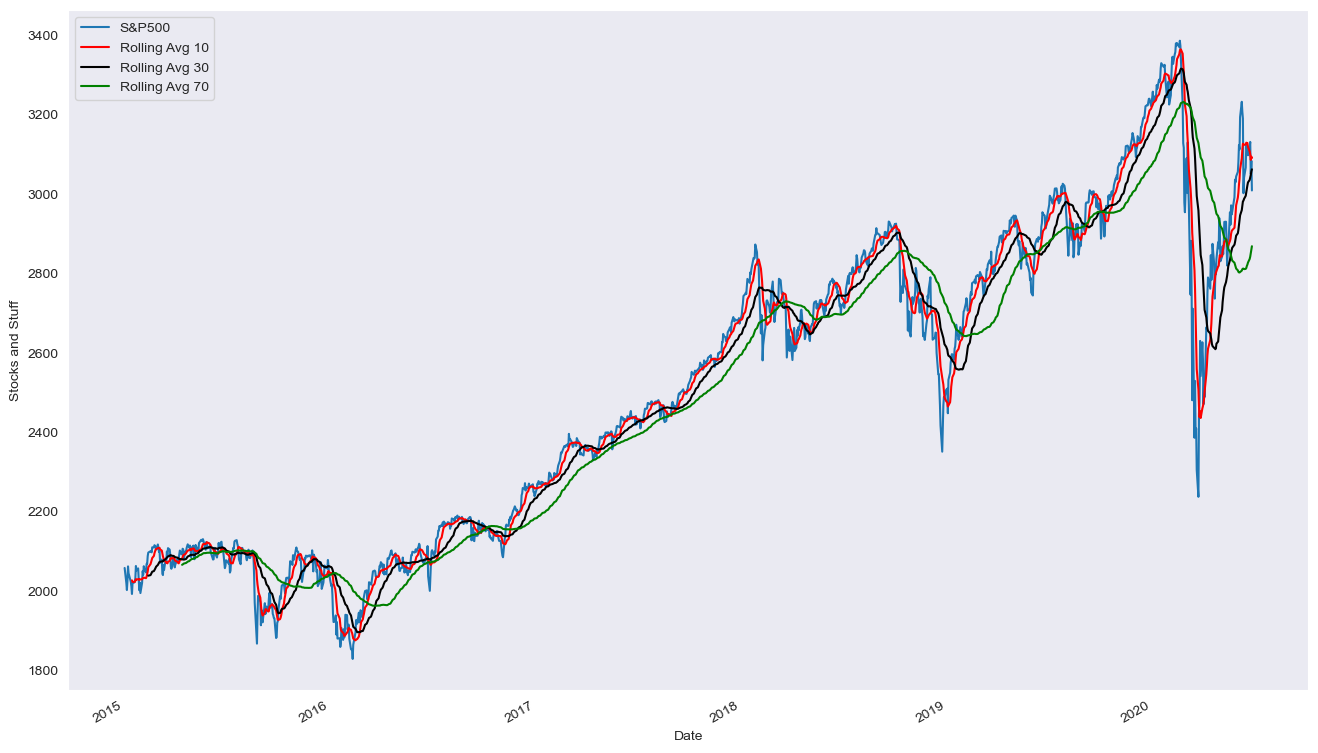

In [27]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.autofmt_xdate()
ax.plot(df_sample.SP500, label='S&P500', color='tab:blue')
ax.plot(roll_avg_10, label='Rolling Avg 10', color='r')
ax.plot(roll_avg_30, label='Rolling Avg 30', color='k')
ax.plot(roll_avg_70, label='Rolling Avg 70', color='g')
ax.legend()
ax.grid()
ax.set(xlabel='Date',ylabel='Stocks and Stuff')

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
sm.graphics.tsa.plot_acf(df_sample.iloc[1:]['SP500'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
sm.graphics.tsa.plot_pacf(df_sample.iloc[1:]['SP500'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

ImportError: cannot import name 'tools' from 'statsmodels' (C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\__init__.py)

In [29]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

ModuleNotFoundError: No module named 'pandas.util.testing'

In [18]:
check_stationarity(df_sample.SP500)

The test statistic: -1.508554
p-value: 0.529276
Critical Values:
1%: -3.435
5%: -2.864
10%: -2.568



The test statistic exceeds the critical value at the 5% significance level, and the p-value is also greater than 0.05. Therefore, we cannot reject the null hypothesis in favor of the alternative hypothesis. Consequently, the time series is deemed non-stationary.

In [20]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [21]:
df_diff =  difference(df_sample.SP500, 1)

<AxesSubplot: >

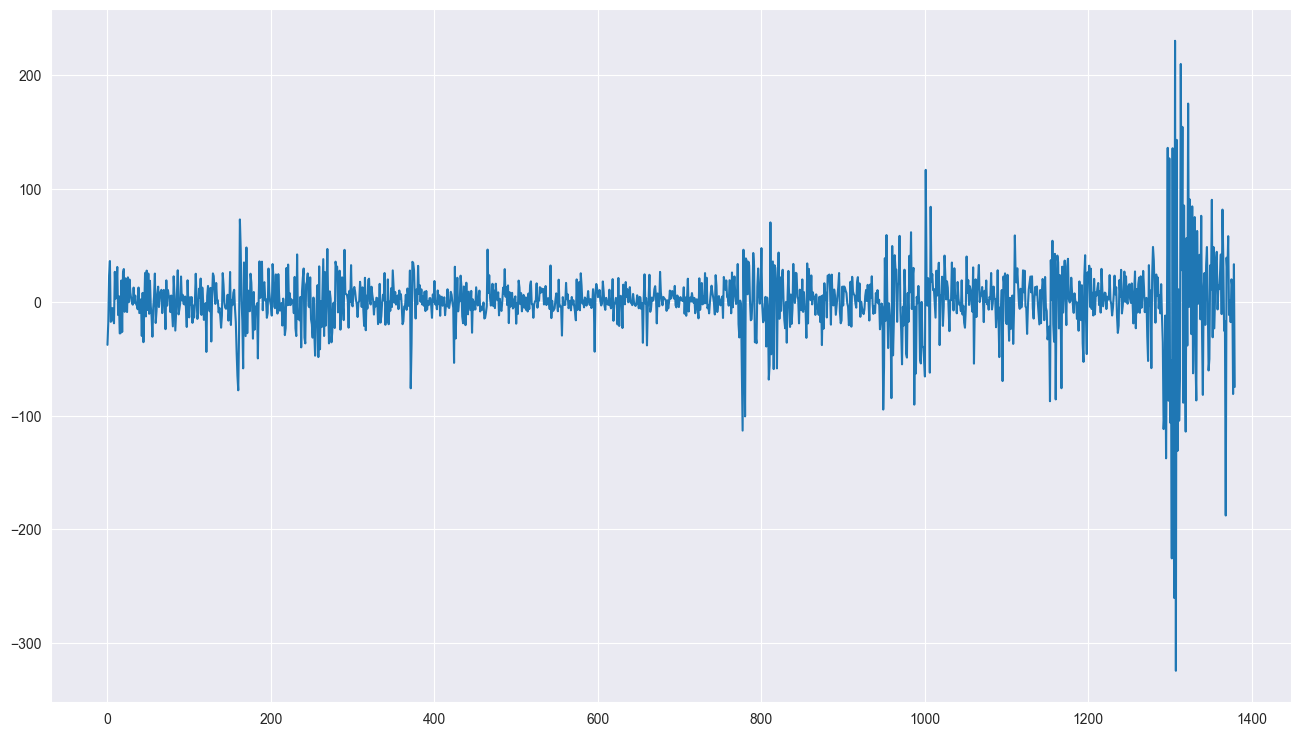

In [22]:
df_diff.plot(figsize=(16, 9))

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_sample['SP500'], model='additive', freq=30)
# decomposition = pd.Series(df_sample['SP500']).resample('M').mean().diff(1)
plt.rcParams["figure.figsize"] = [13, 7]
fig = decomposition.plot()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [33]:
# move to top 
df_sample = df_sample.assign(y_log=np.log(df_sample.SP500))
df_sample.head()

,SP500,y_log
DATE,,
2015-01-02,2058.20,7.629587
2015-01-05,2020.58,7.611140
2015-01-06,2002.61,7.602207
2015-01-07,2025.90,7.613769
2015-01-08,2062.14,7.631500


# ARIMA

In [35]:
# from statsmodels.tsa.arima_model import ARIMA
#
# model = ARIMA(df_sample.y_log, order=(1,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_sample.y_log, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  y_log   No. Observations:                 1381
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4194.395
Date:                Sat, 11 May 2024   AIC                          -8380.790
Time:                        15:29:47   BIC                          -8359.871
Sample:                             0   HQIC                         -8372.965
                               - 1381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1436      0.072     -1.980      0.048      -0.286      -0.001
ma.L1         -0.0497      0.072     -0.692      0.489      -0.191       0.091
ma.L2          0.1296      0.018      7.176      0.0

In [37]:
model = ARIMA(df_sample.y_log, order=(3,2,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  y_log   No. Observations:                 1381
Model:                 ARIMA(3, 2, 1)   Log Likelihood                4172.528
Date:                Sat, 11 May 2024   AIC                          -8335.055
Time:                        15:30:18   BIC                          -8308.910
Sample:                             0   HQIC                         -8325.274
                               - 1381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2203      0.011    -19.334      0.000      -0.243      -0.198
ar.L2          0.1196      0.013      9.280      0.000       0.094       0.145
ar.L3          0.0796      0.014      5.886      0.0

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
import itertools

p = [0, 1, 2, 4, 6, 8, 10]
d = range(0, 3)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))

In [44]:
from statsmodels.tsa.arima.model import ARIMA

best_aic = float("inf")
best_param = None

for param in pdq:
    try:
        model = ARIMA(df_sample.y_log, order=param)
        results = model.fit()
        aic = results.aic
        print('ARIMA{} - AIC:{}'.format(param, aic))
        if aic < best_aic:
            best_aic = aic
            best_param = param
    except Exception as e:
        print(f'ARIMA{param} - AIC: Error: {str(e)}')
        continue

print(f"Best Model: ARIMA{best_param} - AIC: {best_aic}")

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(8, 2, 2) - AIC:-8418.548043072098
ARIMA(10, 0, 0) - AIC:-8484.532882673144


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 0, 1) - AIC:-8484.579762453657


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 0, 2) - AIC:-8481.188010984457


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 1, 0) - AIC:-8486.230607423644


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 1, 1) - AIC:-8484.140071761089


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 1, 2) - AIC:-8481.836927875047


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(10, 2, 0) - AIC:-8371.100186111606


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(10, 2, 1) - AIC:-8404.919029833123
ARIMA(10, 2, 2) - AIC:-8436.081914403221


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(0, 0, 0) - AIC:-1251.4728456951393

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA(0, 0, 1) - AIC:-3051.2135586201384


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - AIC:-4289.552053160703
ARIMA(0, 1, 0) - AIC:-8305.78866392331
ARIMA(0, 1, 1) - AIC:-8354.815346110152


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(0, 1, 2) - AIC:-8381.500883597602
ARIMA(0, 2, 0) - AIC:-7079.825819263075
ARIMA(0, 2, 1) - AIC:-8238.457100460257


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(0, 2, 2) - AIC:-8339.987578542452
ARIMA(1, 0, 0) - AIC:-8304.262220904166


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) - AIC:-8352.732295928703


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) - AIC:-8379.780105343962
ARIMA(1, 1, 0) - AIC:-8367.884397902835


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 1, 1) - AIC:-8371.893078708386
ARIMA(1, 1, 2) - AIC:-8380.790370078517
ARIMA(1, 2, 0) - AIC:-7813.583281047566


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(1, 2, 1) - AIC:-8352.085844054156
ARIMA(1, 2, 2) - AIC:-8297.062945766222
ARIMA(2, 0, 0) - AIC:-8365.557923158678


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it ha

ARIMA(2, 0, 1) - AIC:-8358.441106540575


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - AIC:-8378.836267673614


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(2, 1, 0) - AIC:-8378.097115428664
ARIMA(2, 1, 1) - AIC:-8372.914430633107


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(2, 1, 2) - AIC:-8380.26672196192
ARIMA(2, 2, 0) - AIC:-8007.687686025416


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(2, 2, 1) - AIC:-8362.22978095543


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(2, 2, 2) - AIC:-8384.07552888334
ARIMA(4, 0, 0) - AIC:-8377.062461159232


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(4, 0, 1) - AIC:-8440.852933611059


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(4, 0, 2) - AIC:-8441.236968023588
ARIMA(4, 1, 0) - AIC:-8391.071462233705
ARIMA(4, 1, 1) - AIC:-8387.921836910256


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 1, 2) - AIC:-8384.195549703638
ARIMA(4, 2, 0) - AIC:-8136.614627224099


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it ha

ARIMA(4, 2, 1) - AIC:-8351.963022461734


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(4, 2, 2) - AIC:-8436.64842389094
ARIMA(6, 0, 0) - AIC:-8391.005541677678


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(6, 0, 1) - AIC:-8394.675562153137


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(6, 0, 2) - AIC:-8445.492012994893
ARIMA(6, 1, 0) - AIC:-8407.998389251776


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(6, 1, 1) - AIC:-8471.952567664022
ARIMA(6, 1, 2) - AIC:-8399.470174495571


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(6, 2, 0) - AIC:-8294.176505973268


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(6, 2, 1) - AIC:-8333.898572830934


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(6, 2, 2) - AIC:-8438.58698909626
ARIMA(8, 0, 0) - AIC:-8452.326295394703


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(8, 0, 1) - AIC:-8478.175597295514


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(8, 0, 2) - AIC:-8480.292833298452
ARIMA(8, 1, 0) - AIC:-8470.429432148607


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(8, 1, 1) - AIC:-8466.064604523566


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(8, 1, 2) - AIC:-8481.777466919058
ARIMA(8, 2, 0) - AIC:-8356.848919429467


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(8, 2, 1) - AIC:-8393.62820832782


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(8, 2, 2) - AIC:-8418.548043072098
ARIMA(10, 0, 0) - AIC:-8484.532882673144


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 0, 1) - AIC:-8484.579762453657


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 0, 2) - AIC:-8481.188010984457


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 1, 0) - AIC:-8486.230607423644


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 1, 1) - AIC:-8484.140071761089


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(10, 1, 2) - AIC:-8481.836927875047


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

ARIMA(10, 2, 0) - AIC:-8371.100186111606


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA(10, 2, 1) - AIC:-8404.919029833123
ARIMA(10, 2, 2) - AIC:-8436.081914403221
Best Model: ARIMA(10, 1, 0) - AIC: -8486.230607423644


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best parameters: ARIMA(8, 0, 2) - AIC:-8485.567422326247

In [47]:
# best_order = (8, 0, 2)
# model = ARIMA(df_sample.y_log, order=best_order)
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

best_order = (8, 0, 2)
try:
    model = ARIMA(df_sample.y_log, order=best_order)
    model_fit = model.fit()
    print(model_fit.summary())
except Exception as e:
    print(f'Error: {str(e)}')


C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  y_log   No. Observations:                 1381
Model:                 ARIMA(8, 0, 2)   Log Likelihood                4252.146
Date:                Sat, 11 May 2024   AIC                          -8480.293
Time:                        15:42:41   BIC                          -8417.526
Sample:                             0   HQIC                         -8456.813
                               - 1381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8170      0.084     93.420      0.000       7.653       7.981
ar.L1          0.4869      0.133      3.664      0.000       0.226       0.747
ar.L2          0.6835      0.041     16.613      0.0

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[]

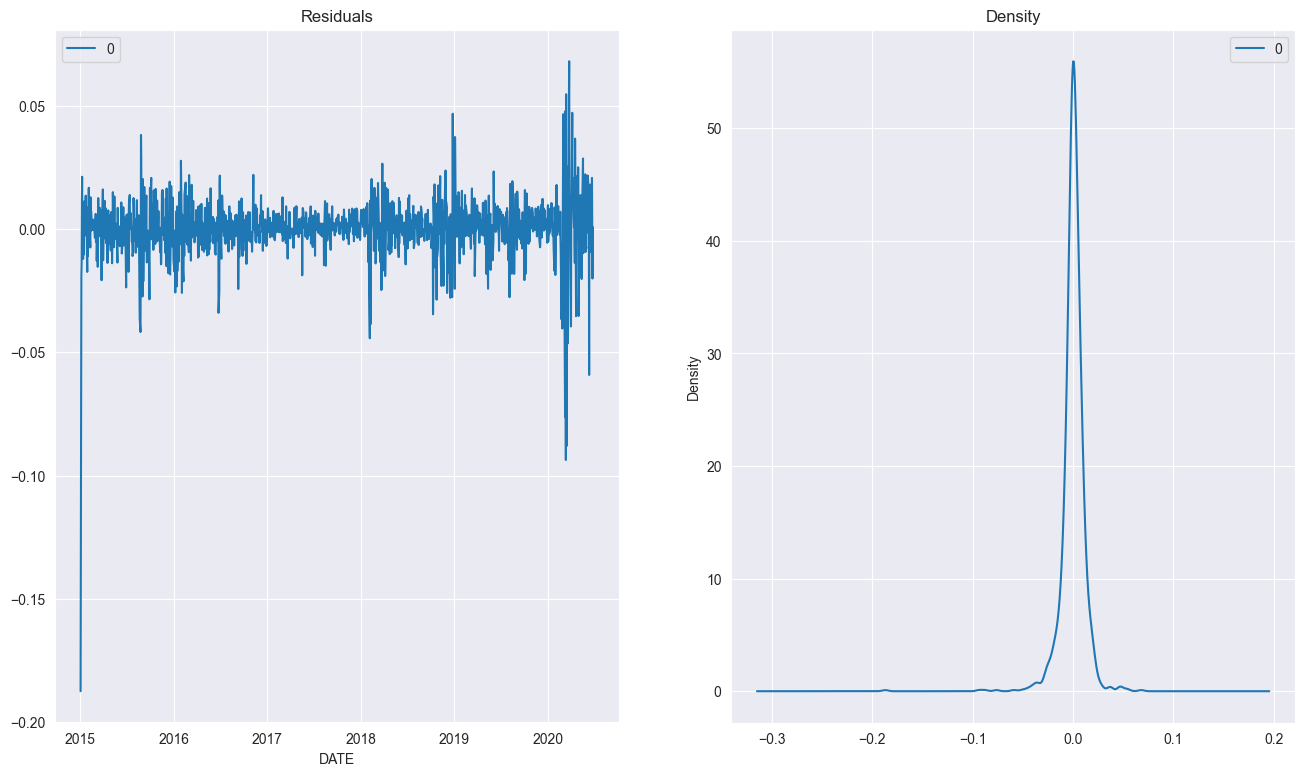

In [48]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(16, 9))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.plot()

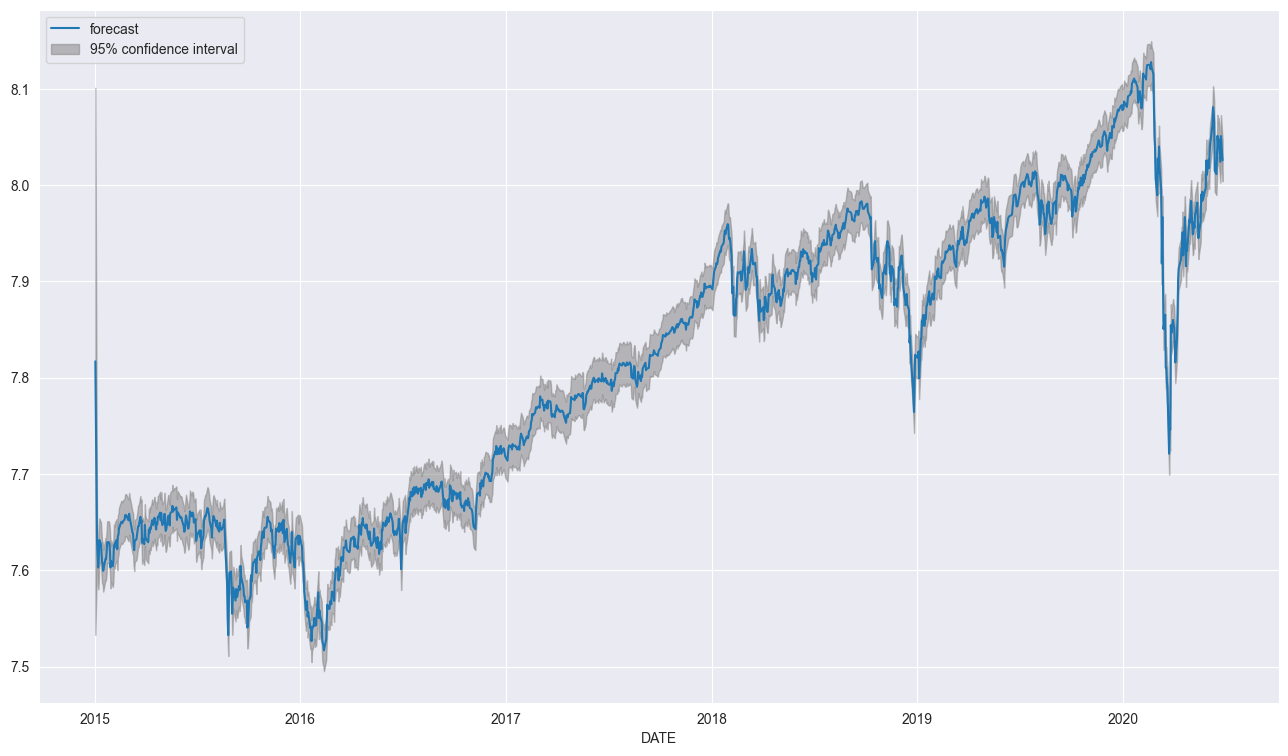

In [60]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

n, m = 16, 9
with plt.rc_context(rc={"figure.figsize": (n, m)}):
    plot_predict(model_fit, dynamic=False)
    plt.show()

In [61]:
TRAIN_END_INDEX = 1361
# Create Training and Test
train = df_sample.y_log[:TRAIN_END_INDEX]
test = df_sample.y_log[TRAIN_END_INDEX:]

In [62]:
# Build Model
model = ARIMA(train, order=best_order)  
fitted = model.fit(disp=-1)

# Forecast
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TypeError: fit() got an unexpected keyword argument 'disp'

NameError: name 'lower_series' is not defined

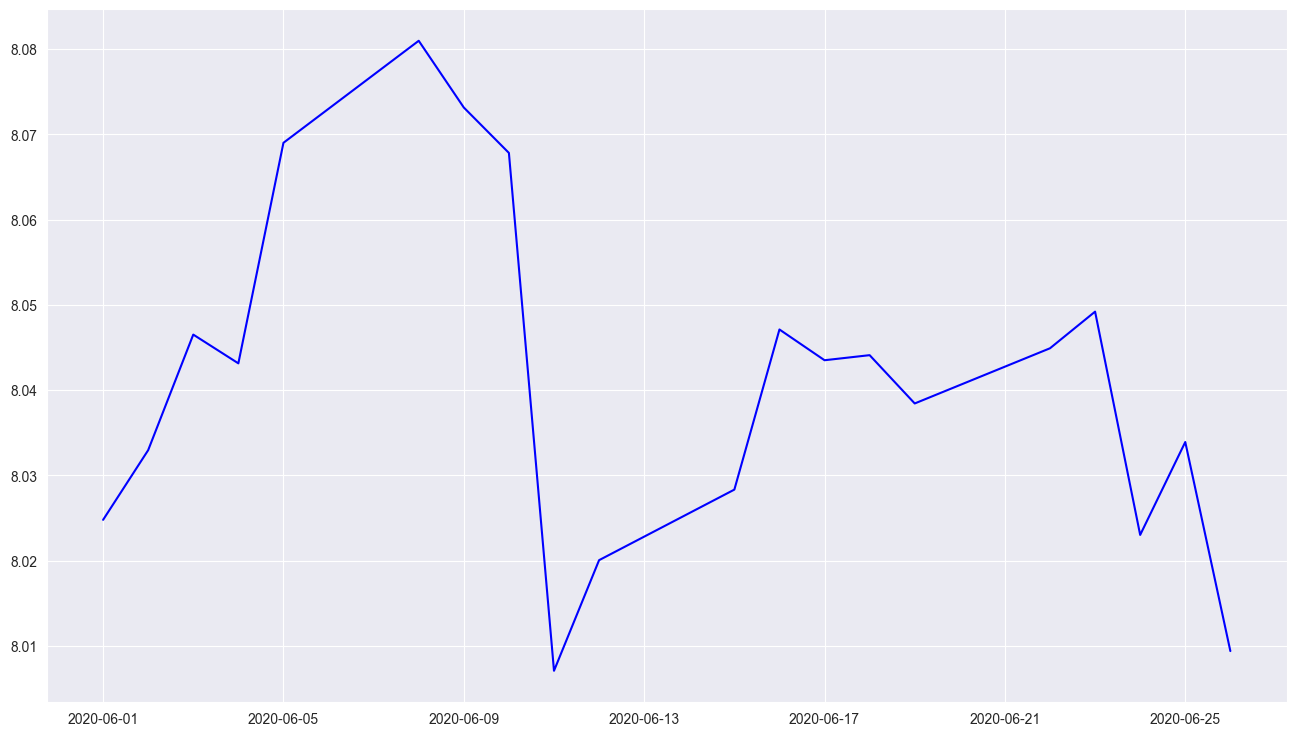

In [59]:
# Plot
plt.figure(figsize=(16, 9))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [32]:
fc_series.index

Index([2020-06-01, 2020-06-02, 2020-06-03, 2020-06-04, 2020-06-05, 2020-06-08,
       2020-06-09, 2020-06-10, 2020-06-11, 2020-06-12, 2020-06-15, 2020-06-16,
       2020-06-17, 2020-06-18, 2020-06-19, 2020-06-22, 2020-06-23, 2020-06-24,
       2020-06-25, 2020-06-26],
      dtype='object', name='DATE')

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7f2d71bd9630>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7f2d71beebe0>)

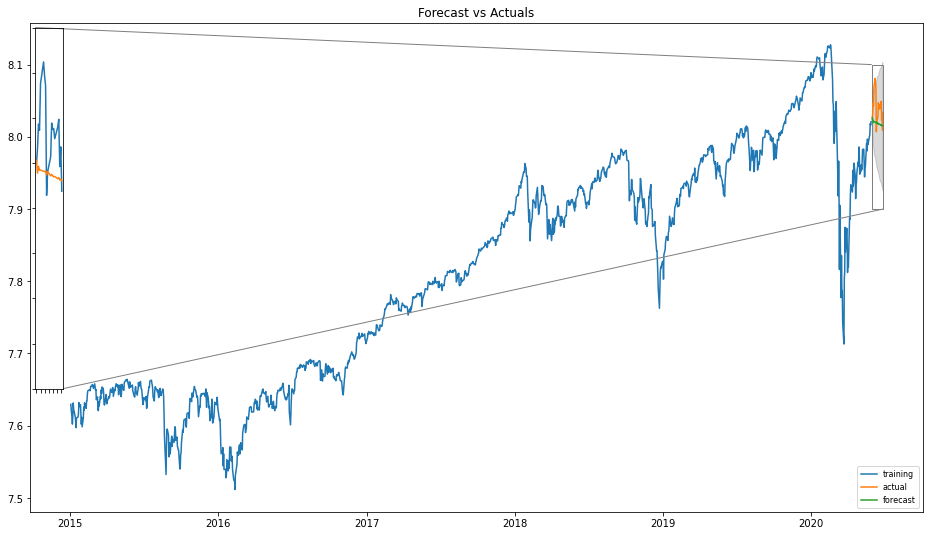

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(train, label='training')
ax.plot(test, label='actual')
ax.plot(fc_series, label='forecast')
ax.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
ax.set_title('Forecast vs Actuals')
ax.legend(loc='lower right', fontsize=8)

axins = zoomed_inset_axes(ax, 2.5, loc=2) # zoom-factor: 2.5, location: upper-left
# axins.plot(train)
axins.plot(test)
axins.plot(fc_series)

# # x1, x2, y1, y2 = '2020-06-01', '2020-06-26', 2800, 3300 # specify the limits
x1, x2, y1, y2 = '2020-05-01', '2020-06-26', 7.9, 8.1 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

In [34]:
# y_true cannot be zero will cause div by zero error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('ARIMA model mse :', mean_squared_error(np.exp(test), np.exp(fc_series)))
print('ARIMA model mae :', mean_absolute_error(np.exp(test), np.exp(fc_series)))
print('ARIMA model mape :', mean_absolute_percentage_error(np.exp(test), np.exp(fc_series)))

ARIMA model mse : 8373.648947333628
ARIMA model mae : 75.04432417329758
ARIMA model mape : 2.3843895896239635


# SARIMAX

In [36]:
# p_values = [0, 1, 2, 4, 6, 8, 10]
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(df_sample.y_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9592.66769121692
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7684.807638467787
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-5148.817955840601
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-5092.821269253875
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-5164.531728639009
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-5158.009874422289
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-5097.319373717808
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-5103.687850466811
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7684.616298678026
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5793.680125719456
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-6213.711919458961
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-6178.220518388822
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-6229.826659521026
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-6252.456315601492
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-6176.691802009218
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-6239.364130605947
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-8301.16207044468
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-8232.03784161632

Best SARIMAX params: ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-8350.051909976024



In [38]:
# Fitting the data to ARIMA model 
model_sarima = SARIMAX(df_sample.y_log,
                                order=(1, 0, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.61e-05   2.77e+04      0.000       1.000       1.000
ma.L1         -0.1952      0.010    -19.248      0.000      -0.215      -0.175
sigma2         0.0001   1.73e-06     78.980      0.000       0.000       0.000


[]

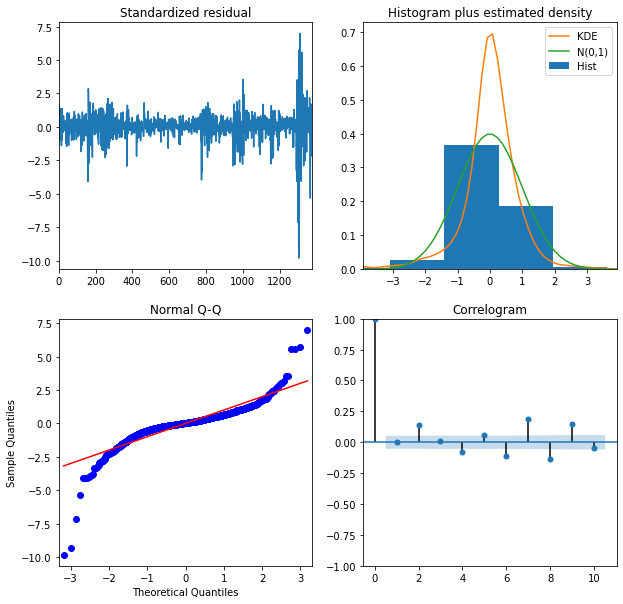

In [39]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.plot()

In [40]:
# Build Model
model = SARIMAX(train,
                order=(1, 0, 1),
                seasonal_order=(0, 0, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)  
# model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

In [41]:
# Forecast
fc = fitted.forecast(20)

In [42]:

# Make as pandas series
fc_series = pd.Series(fc.values, index=test.index)

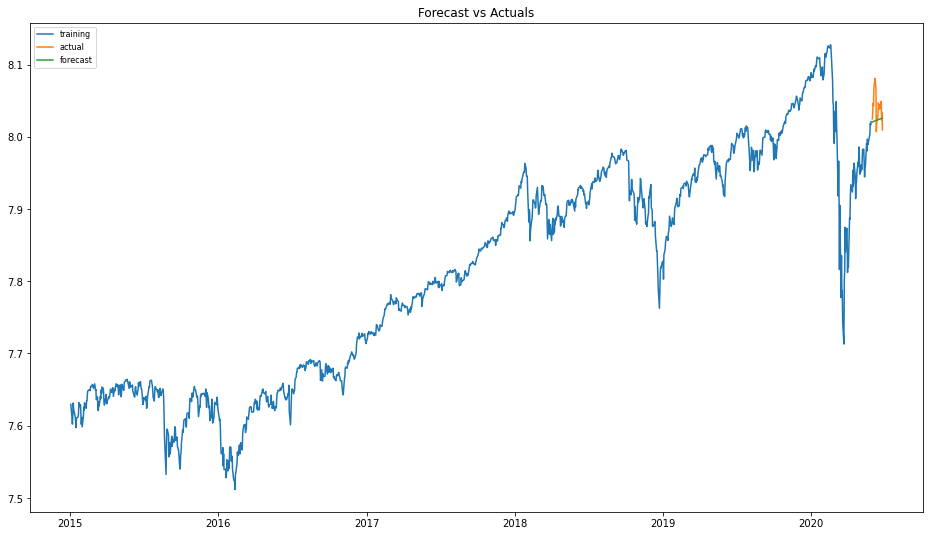

In [43]:
# Plot
plt.figure(figsize=(16, 9))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7f2d703b1400>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7f2d703b1f98>)

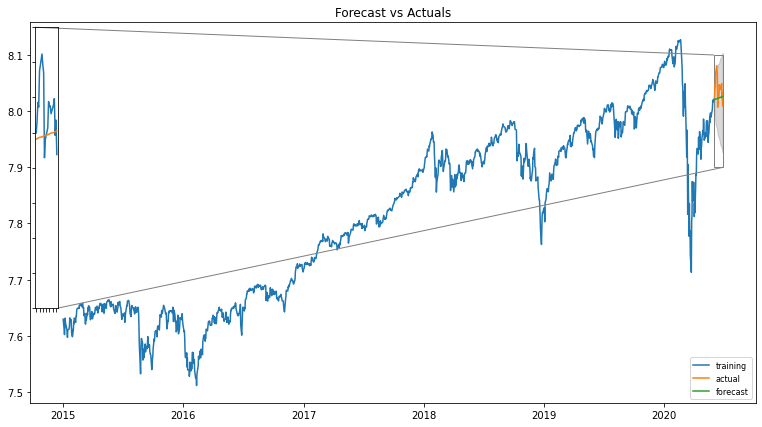

In [44]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 

fig, ax = plt.subplots()
ax.plot(train, label='training')
ax.plot(test, label='actual')
ax.plot(fc_series, label='forecast')
ax.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
ax.set_title('Forecast vs Actuals')
ax.legend(loc='lower right', fontsize=8)

axins = zoomed_inset_axes(ax, 2.5, loc=2) # zoom-factor: 2.5, location: upper-left
axins.plot(test)
axins.plot(fc_series)

# x1, x2, y1, y2 = 2550, 2620, 2800, 3300 # specify the limits
x1, x2, y1, y2 = 2550, 2620, 7.9, 8.1 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

In [45]:
print('SARIMAX model MSE :', mean_squared_error(np.exp(test), np.exp(fc_series)))
print('SARIMAX model MAE :', mean_absolute_error(np.exp(test), np.exp(fc_series)))
print('SARIMAX model MAPE :', mean_absolute_percentage_error(np.exp(test), np.exp(fc_series)))

SARIMAX model MSE : 7160.399849765299
SARIMAX model MAE : 67.83487405471803
SARIMAX model MAPE : 2.1557077179276494


# PROPHET

In [46]:
from fbprophet import Prophet

In [47]:
df_sample.head()

,SP500,y_log
DATE,,
2015-01-02,2058.20,7.629587
2015-01-05,2020.58,7.611140
2015-01-06,2002.61,7.602207
2015-01-07,2025.90,7.613769
2015-01-08,2062.14,7.631500


In [48]:
df_prophet = df_sample.copy()

In [49]:
df_prophet['DATE'] = df_sample.index
df_prophet.head()

,SP500,y_log,DATE
DATE,,,
2015-01-02,2058.20,7.629587,2015-01-02
2015-01-05,2020.58,7.611140,2015-01-05
2015-01-06,2002.61,7.602207,2015-01-06
2015-01-07,2025.90,7.613769,2015-01-07
2015-01-08,2062.14,7.631500,2015-01-08


In [50]:
df_prophet = df_prophet.rename(columns={'SP500':'y', 'DATE':'ds'})
df_prophet.head(2)

,y,y_log,ds
DATE,,,
2015-01-02,2058.20,7.629587,2015-01-02
2015-01-05,2020.58,7.611140,2015-01-05


In [51]:
TRAIN_END_INDEX = 1361

# Create Training and Test df
train = df_prophet[:TRAIN_END_INDEX]
test = df_prophet[TRAIN_END_INDEX:]

In [52]:
model = Prophet(daily_seasonality=True) #instantiate Prophet
model.fit(train); #fit the model with your dataframe

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [53]:
future_data = model.make_future_dataframe(periods=20)

In [54]:
forecast_data = model.predict(future_data)

In [55]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1376,2020-06-14,2995.725552,2858.971432,3116.115988
1377,2020-06-15,2993.618216,2871.851409,3123.648285
1378,2020-06-16,2996.411623,2871.374740,3119.556263
1379,2020-06-17,2994.592422,2864.974004,3114.627420
1380,2020-06-18,2995.386109,2879.720857,3109.125668


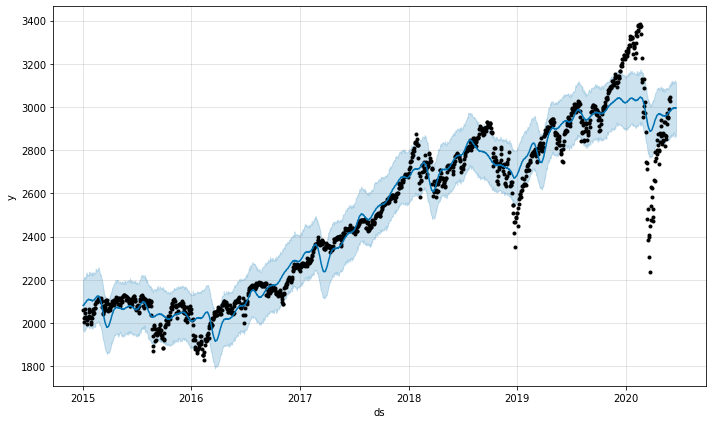

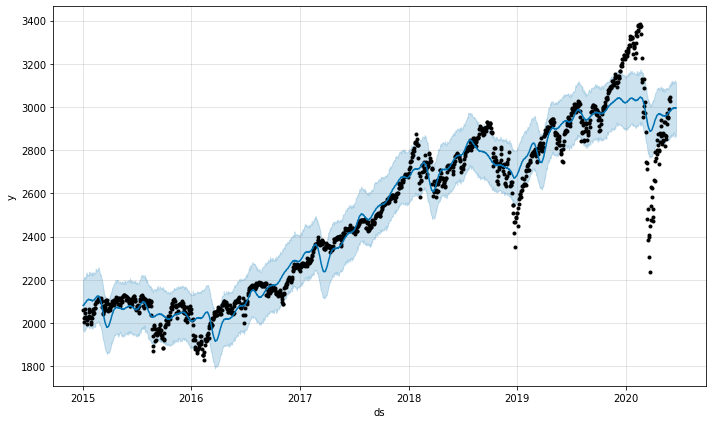

In [56]:
model.plot(forecast_data)

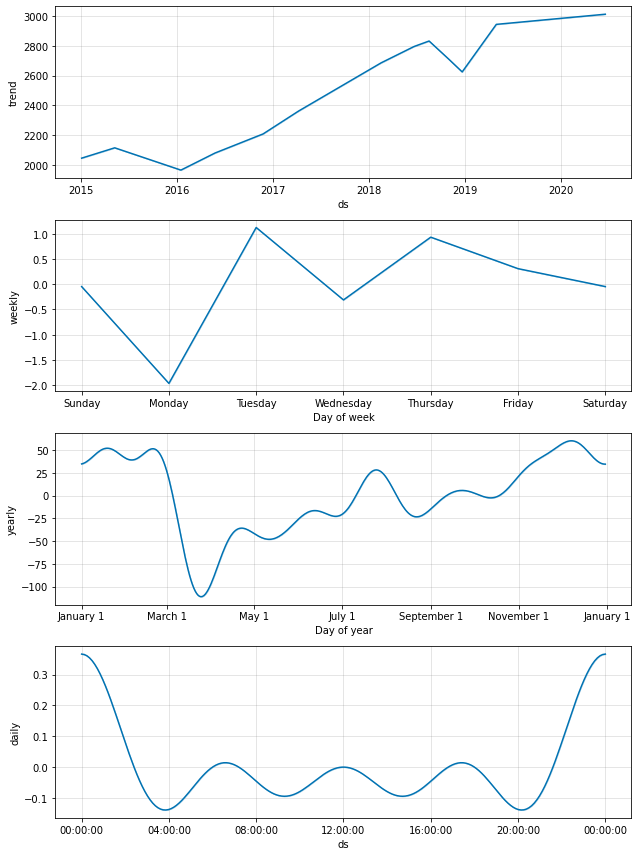

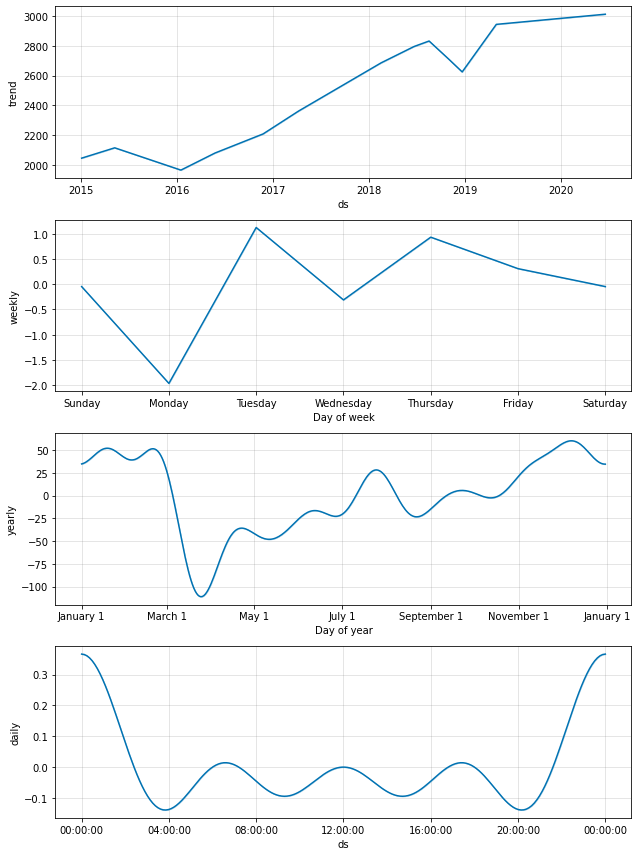

In [57]:
model.plot_components(forecast_data)

In [58]:
forecast = forecast_data.yhat[-20:]

In [59]:
test['y'][:5]

DATE
2020-06-01    3055.73
2020-06-02    3080.82
2020-06-03    3122.87
2020-06-04    3112.35
2020-06-05    3193.93
Name: y, dtype: float64

In [60]:
print('Prophet model MAE :', mean_squared_error(test['y'], forecast))
print('Prophet model MSE :', mean_absolute_error(test['y'], forecast))
print('Prophet model MAPE :', mean_absolute_percentage_error(test['y'], forecast))

Prophet model MAE : 17202.67839237924
Prophet model MSE : 115.50408153919875
Prophet model MAPE : 3.6792422446853497


# LSTM

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
scaled_df = df_sample.SP500.values.reshape(df_sample.SP500.shape[0], 1)
scaled_df = scaler.fit_transform(scaled_df)

In [63]:
scaled_df.shape

(1381, 1)

In [64]:
def preprocess(df, look_back):
    X, y = [], []
    for i in range(look_back, len(df)):
        X.append(df[i-look_back:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [65]:
look_back = 60
X, y = preprocess(scaled_df, look_back)

In [66]:
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1188
133
1188
133


In [67]:
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, LSTM


Using TensorFlow backend.


In [68]:
#Build the model
model1 = Sequential()
model1.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [69]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [70]:
#Fit model with history to check for overfitting
history1 = model1.fit(X_train,y_train,epochs=40, validation_data=(X_test,y_test),shuffle=False)

Train on 1188 samples, validate on 133 samples
Epoch 1/40
1188/1188 [==============================] - 2s 1ms/step - loss: 0.0033 - val_loss: 0.0104
Epoch 2/40
1188/1188 [==============================] - 1s 1ms/step - loss: 0.0064 - val_loss: 0.0103
Epoch 3/40
1188/1188 [==============================] - 1s 1ms/step - loss: 0.0049 - val_loss: 0.0059
Epoch 4/40
1188/1188 [==============================] - 1s 1ms/step - loss: 6.3039e-04 - val_loss: 0.0065
Epoch 5/40
1188/1188 [==============================] - 1s 1ms/step - loss: 5.8396e-04 - val_loss: 0.0063
Epoch 6/40
1188/1188 [==============================] - 1s 1ms/step - loss: 5.5111e-04 - val_loss: 0.0062
Epoch 7/40
1188/1188 [==============================] - 1s 1ms/step - loss: 5.4793e-04 - val_loss: 0.0060
Epoch 8/40
1188/1188 [==============================] - 1s 1ms/step - loss: 5.2134e-04 - val_loss: 0.0058
Epoch 9/40
1188/1188 [==============================] - 1s 1ms/step - loss: 5.2238e-04 - val_loss: 0.0056
Epoch 10/40

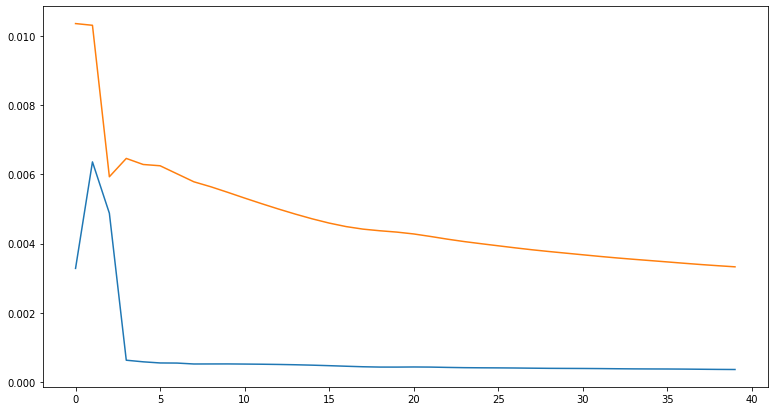

In [71]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

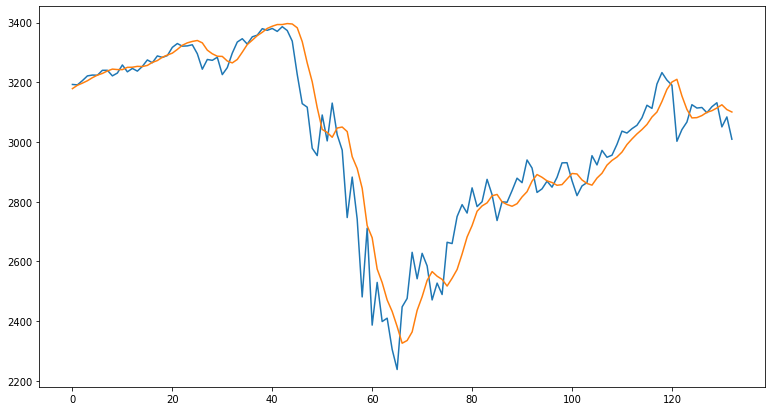

In [72]:
Xt = model1.predict(X_test)
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt))

In [73]:
X_test.shape[0]

133

In [74]:
act = []
pred = []
for i in range(X_test.shape[0]):
  # i=274
  Xt = model1.predict(X_test[i].reshape(1, 60,1))
  # print('predicted:{0}, actual:{1}'.format(scaler.inverse_transform(Xt),scaler.inverse_transform(y_test[i].reshape(-1,1))))
  pred.append(scaler.inverse_transform(Xt))
  act.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))

In [75]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})
result_df.head()

,pred,act
0,3178.526611,3192.52
1,3189.782471,3191.14
2,3196.931152,3205.37
3,3205.003662,3221.22
4,3215.210449,3224.01


In [76]:
result_df.shape

(133, 2)

In [77]:
# test = np.exp(result_df['act'])
# forecast = np.exp(result_df['pred'])

test = result_df['act']
forecast = result_df['pred']

In [78]:
# print('LSTM model MSE :', mean_squared_error(np.exp(test), np.exp(forecast)))
# print('LSTM model MAE :', mean_absolute_error(np.exp(test), np.exp(forecast)))
# print('LSTM model MAPE :', mean_absolute_percentage_error(np.exp(test), np.exp(forecast)))

In [79]:
print('LSTM model MSE :', mean_squared_error(test, forecast))
print('LSTM model MAE :', mean_absolute_error(test, forecast))
print('LSTM model MAPE :', mean_absolute_percentage_error(test, forecast))

LSTM model MSE : 8065.507542386569
LSTM model MAE : 59.90512291470866
LSTM model MAPE : 2.1257195688394996


## Stacked LSTM

In [80]:
#Build the model
model2 = Sequential()
model2.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model2.add(LSTM(64, return_sequences=True))
model2.add(LSTM(64))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 64)            16896     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 64)            33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 83,009
Trainable params: 83,009
Non-trainable params: 0
_________________________________________________________________


In [81]:
history2 = model2.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test), shuffle=False)

Train on 1188 samples, validate on 133 samples
Epoch 1/100
1188/1188 [==============================] - 5s 4ms/step - loss: 0.0048 - val_loss: 0.0166
Epoch 2/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0098 - val_loss: 0.0161
Epoch 3/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0154 - val_loss: 0.0315
Epoch 4/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0129 - val_loss: 0.0235
Epoch 5/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0028 - val_loss: 0.0129
Epoch 6/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0024 - val_loss: 0.0125
Epoch 7/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0013 - val_loss: 0.0128
Epoch 8/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0019 - val_loss: 0.0124
Epoch 9/100
1188/1188 [==============================] - 4s 3ms/step - loss: 0.0010 - val_loss: 0.0119
Epoch 10/100
1188/1188 [==

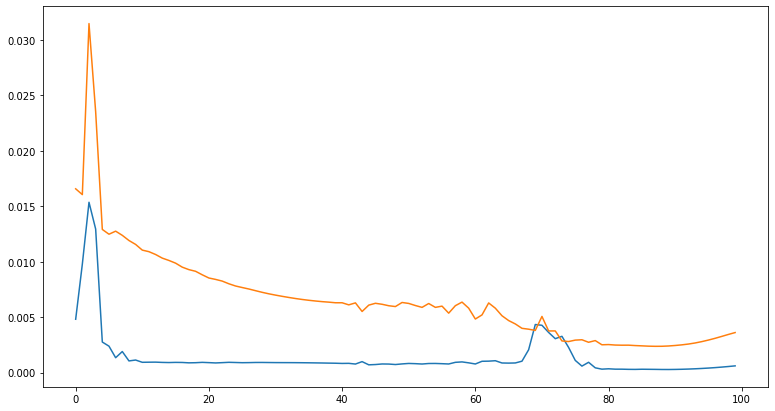

In [82]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

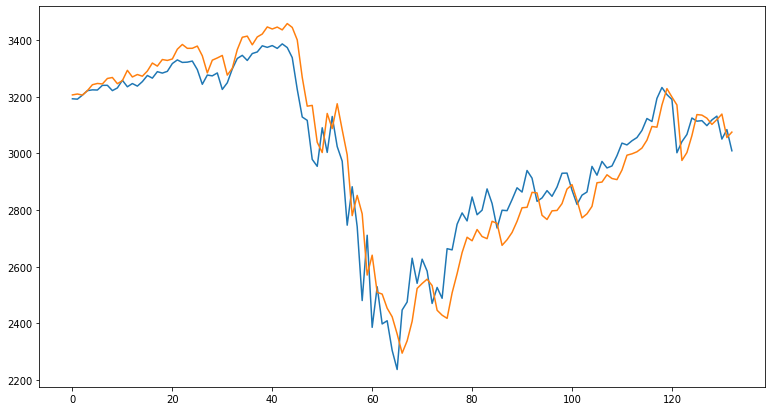

In [83]:
Xt2 = model2.predict(X_test)
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt2))

In [84]:
act2 = []
pred2 = []
for i in range(X_test.shape[0]):
  # i=274
  Xt2 = model2.predict(X_test[i].reshape(1, 60,1))
  # print('predicted:{0}, actual:{1}'.format(scaler.inverse_transform(Xt),scaler.inverse_transform(y_test[i].reshape(-1,1))))
  pred2.append(scaler.inverse_transform(Xt2))
  act2.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))

In [85]:
result_df2 = pd.DataFrame({'pred':list(np.reshape(pred2, (-1))),'act':list(np.reshape(act2, (-1)))})
result_df2.head()

,pred,act
0,3206.176025,3192.52
1,3209.368408,3191.14
2,3205.572754,3205.37
3,3221.192871,3221.22
4,3242.097900,3224.01


In [86]:
# test2 = np.exp(result_df2['act'])
# forecast2 = np.exp(result_df2['pred'])

test2 = result_df2['act']
forecast2 = result_df2['pred']

In [87]:
print('LSTM model MSE :', mean_squared_error(test2, forecast2))
print('LSTM model MAE :', mean_absolute_error(test2, forecast2))
print('LSTM model MAPE :', mean_absolute_percentage_error(test2, forecast2))

LSTM model MSE : 8746.264880343393
LSTM model MAE : 73.64643811677631
LSTM model MAPE : 2.5585887766466593


## CNN LSTM

In [88]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [89]:
X_train = X_train.reshape((X_train.shape[0],1, 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, 1, X_test.shape[1]))
print(X_train.shape, X_test.shape)

(1188, 1, 1, 60) (133, 1, 1, 60)


In [90]:
model3 = Sequential()
model3.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 1, 60)))
model3.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))
model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 1, 64)       3904      
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 64)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 36,993
Trainable params: 36,993
Non-trainable params: 0
_________________________________________________________________


In [91]:
history3 = model3.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test), shuffle=False)

Train on 1188 samples, validate on 133 samples
Epoch 1/100
1188/1188 [==============================] - 0s 403us/step - loss: 0.0055 - val_loss: 0.0406
Epoch 2/100
1188/1188 [==============================] - 0s 74us/step - loss: 0.0026 - val_loss: 0.0355
Epoch 3/100
1188/1188 [==============================] - 0s 78us/step - loss: 0.0025 - val_loss: 0.0259
Epoch 4/100
1188/1188 [==============================] - 0s 75us/step - loss: 0.0026 - val_loss: 0.0261
Epoch 5/100
1188/1188 [==============================] - 0s 75us/step - loss: 0.0027 - val_loss: 0.0270
Epoch 6/100
1188/1188 [==============================] - 0s 74us/step - loss: 0.0023 - val_loss: 0.0232
Epoch 7/100
1188/1188 [==============================] - 0s 73us/step - loss: 0.0017 - val_loss: 0.0188
Epoch 8/100
1188/1188 [==============================] - 0s 73us/step - loss: 0.0014 - val_loss: 0.0165
Epoch 9/100
1188/1188 [==============================] - 0s 72us/step - loss: 0.0015 - val_loss: 0.0154
Epoch 10/100
118

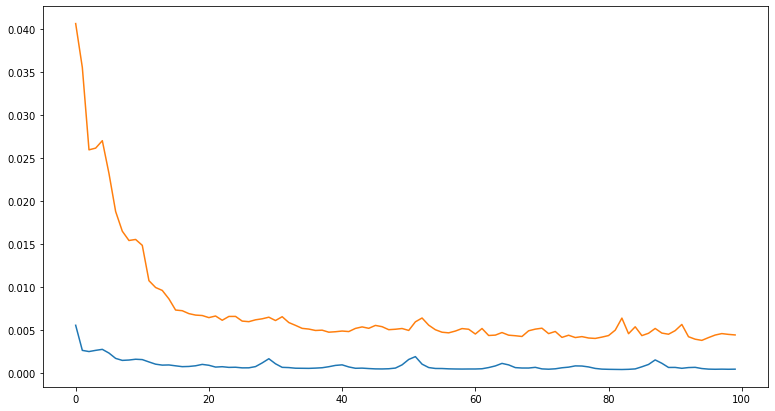

In [92]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

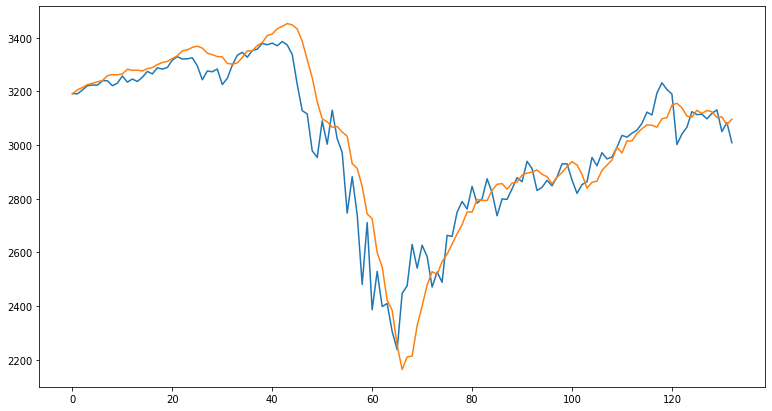

In [93]:
Xt3 = model3.predict(X_test)
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt3))

In [94]:
act3 = []
pred3 = []
for i in range(X_test.shape[0]):
  # i=274
  Xt3 = model3.predict(X_test[i].reshape(1, 1, 1, 60))
  # print('predicted:{0}, actual:{1}'.format(scaler.inverse_transform(Xt),scaler.inverse_transform(y_test[i].reshape(-1,1))))
  pred3.append(scaler.inverse_transform(Xt3))
  act3.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))

In [95]:
result_df3 = pd.DataFrame({'pred':list(np.reshape(pred3, (-1))),'act':list(np.reshape(act3, (-1)))})
result_df3.head(2)

,pred,act
0,3190.428955,3192.52
1,3205.894287,3191.14


In [96]:
test3 = result_df3['act']
forecast3 = result_df3['pred']

In [97]:
print('LSTM model MSE :', mean_squared_error(test3, forecast3))
print('LSTM model MAE :', mean_absolute_error(test3, forecast3))
print('LSTM model MAPE :', mean_absolute_percentage_error(test3, forecast3))

LSTM model MSE : 10689.376926885327
LSTM model MAE : 66.30246761924344
LSTM model MAPE : 2.3295964655884216


# The End